In [1]:
import pandas as pd
df = pd.read_csv('/home/metal-machine/Documents/algoTrading-20/imp-finance-data/BCHARTS-BITFINEXUSD.csv')

In [2]:
df.head() # How to convet Volume(Currency) it into required number? and what is the e numbers there?

,Date,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2016-12-05,768.50,769.00,744.59,747.89,6861.330483,5.168556e+06,753.287783
1,2016-12-04,765.98,769.99,758.82,768.50,4202.675895,3.212609e+06,764.419856
2,2016-12-03,774.87,774.87,755.98,765.46,5730.443186,4.383913e+06,765.021625
3,2016-12-02,755.42,779.21,755.15,774.88,13415.189943,1.032874e+07,769.928584
4,2016-12-01,739.00,756.00,738.80,755.36,13400.312864,1.005340e+07,750.235880


In [3]:
df['Open'].head()

0    768.50
1    765.98
2    774.87
3    755.42
4    739.00
Name: Open, dtype: float64

In [4]:
time = df['Date'] # we can index each row as list entity

In [5]:
time[5]

'2016-11-30'

In [6]:
# calculating returns
rets = df['Weighted Price'].pct_change()

In [7]:
rets.head()

0         NaN
1    0.014778
2    0.000787
3    0.006414
4   -0.025577
Name: Weighted Price, dtype: float64

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

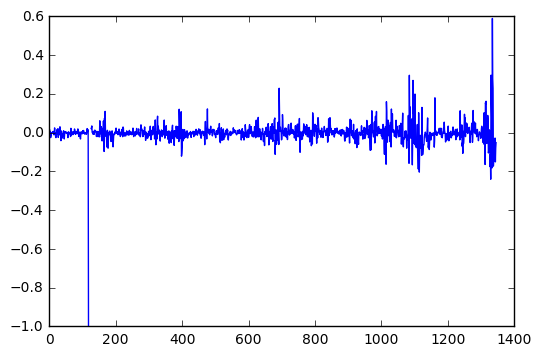

In [9]:
plt.plot(rets)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbce6d1e910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fbce2c17050>]], dtype=object)

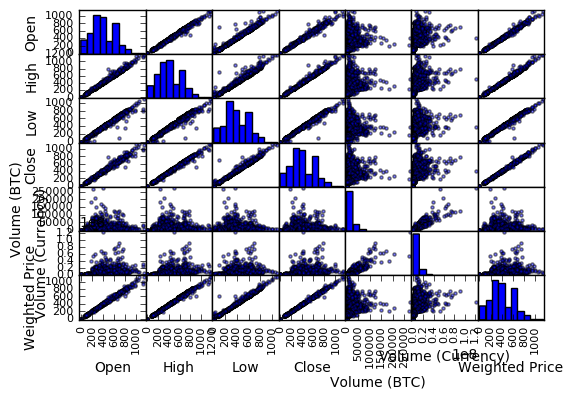

In [10]:
pd.scatter_matrix(df)

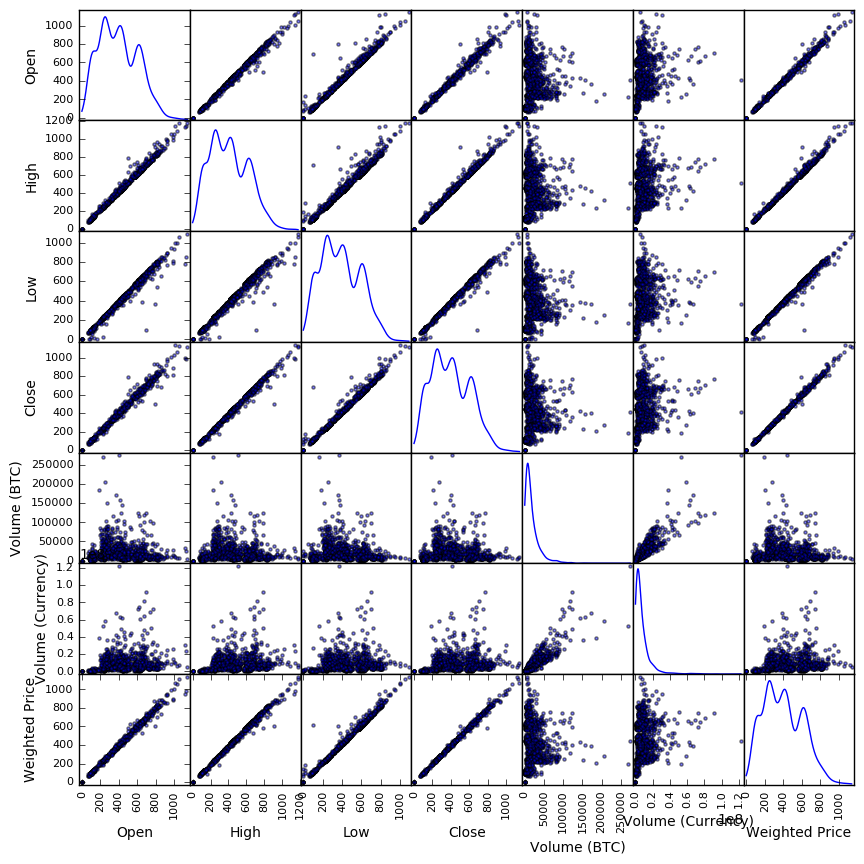

In [11]:
pd.scatter_matrix(df, diagonal='kde', figsize=(10, 10)); # bit nicer

In [12]:
# finding a correlation 
# What is co-relation? , it's significance and much more about it. 
corr = df.corr()

In [13]:
corr

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Open,1.000000,0.996258,0.988689,0.993530,-0.018447,0.268658,0.996957
High,0.996258,1.000000,0.984686,0.995964,0.005255,0.294190,0.996914
Low,0.988689,0.984686,1.000000,0.991979,-0.053265,0.226301,0.994137
Close,0.993530,0.995964,0.991979,1.000000,-0.023711,0.263305,0.998612
Volume (BTC),-0.018447,0.005255,-0.053265,-0.023711,1.000000,0.876682,-0.022552
Volume (Currency),0.268658,0.294190,0.226301,0.263305,0.876682,1.000000,0.263561
Weighted Price,0.996957,0.996914,0.994137,0.998612,-0.022552,0.263561,1.000000


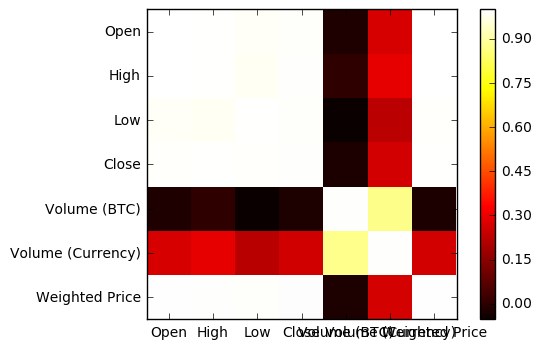

In [14]:
# such Plots do cover large are to interact with 

plt.imshow(corr, cmap='hot', interpolation='None')# try changing the values by yourself to know about Data
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [15]:
from pandas_datareader import data, wb
import datetime
series_list = []
securities = ['AAPL', 'GOOG', 'IBM', 'MSFT'] # get the list of various 

for security in securities:
    # s is now a dataframe
    s = data.get_data_yahoo(security, start=datetime.datetime(2011, 10, 1), end=datetime.datetime(2013, 1, 1))['Adj Close']
    s.name = security # Rename series to match security name
    series_list.append(s)

CParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [ ]:
df = pd.concat(series_list,axis=1) # what will happen if 'axis' is not used?

In [ ]:
df.head()

In [ ]:
m = pd.Period(2007,freq='A-DEC')

In [ ]:
m

In [ ]:
m-2

In [ ]:
m = pd.period_range('1/1/2000', '6/30/2020', freq='A')# you can also use D=days,M=months

In [ ]:
m

In [ ]:
p = pd.Period('2007', freq='A-JUN')

In [ ]:
p.asfreq('M', how='start')

In [ ]:
p.asfreq('Q', how='start')

In [ ]:
import numpy as np
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)),index=rng)

In [ ]:
ts

In [ ]:
ts.asfreq('M', how='start')

In [ ]:
ts.asfreq('D', how='start')

In [ ]:
ts.resample('', how='sum') # use Bitfinex ticker data for this.

In [ ]:
df = pd.read_csv('/home/metal-machine/Documents/algoTrading-20/imp-finance-data/BCHARTS-BITFINEXUSD.csv')

In [ ]:
data = df['Open']
new_df = pd.DataFrame(data,index=df.index)
df.index=df['Date']

In [ ]:
#df['Date'].resample('5min')
df.head()

In [ ]:
df.DatetimeIndex = df['Date'] # index should be index=pd.date_range('1/1/2000', periods=2, freq='W-WED')

In [ ]:
df.head()

Getting good performance out of code utilizing NumPy is often straightforward, as
array operations typically replace otherwise comparatively extremely slow pure Python
loops. Here is a brief list of some of the things to keep in mind:
• Convert Python loops and conditional logic to array operations and boolean array
operations
• Use broadcasting whenever possible
• Avoid copying data using array views (slicing)
• Utilize ufuncs and ufunc methods

In [ ]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
pts = ts.to_period()

In [ ]:
pts

In [ ]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.resample('M').mean()

## DownSampling:


In [ ]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

In [ ]:
ts.resample('5min').sum()

In [ ]:
ts.resample('5min',loffset='-1s').sum()

In [ ]:
ts.resample('5min').ohlc() # nicer one :)

## Interpolation

In [ ]:
frame = pd.DataFrame(np.random.randn(2, 4),index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [ ]:
frame

In [ ]:
df_daily = frame.resample('D').mean()

In [ ]:
df_daily

In [ ]:
df_daily = frame.resample('D').ffill()
df_daily